# Decision Tree and Random Forest Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Get the data

In [2]:
loans = pd.read_csv('../datasets/loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Text(0.5, 1.0, 'FICO')

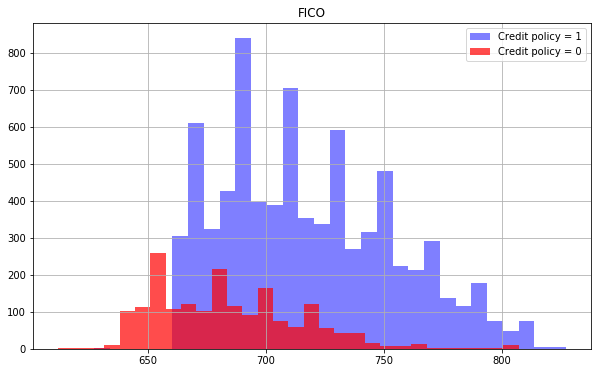

In [5]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,color='blue',label='Credit policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.7,bins=30,color='red',label='Credit policy = 0')
plt.legend()
plt.title('FICO')

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

Text(0.5, 1.0, 'FICO')

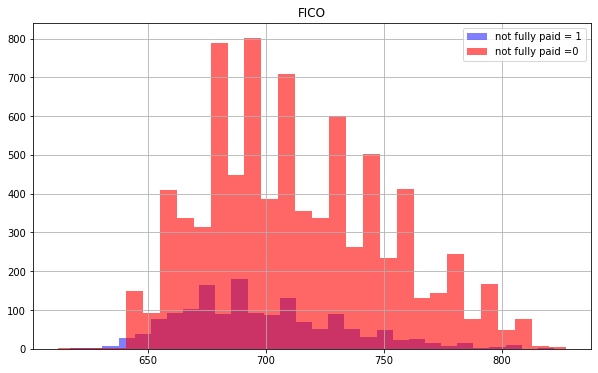

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5,bins=30,label='not fully paid = 1',color='blue')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.6,bins=30,label='not fully paid =0',color='red')
plt.legend()
plt.title('FICO')


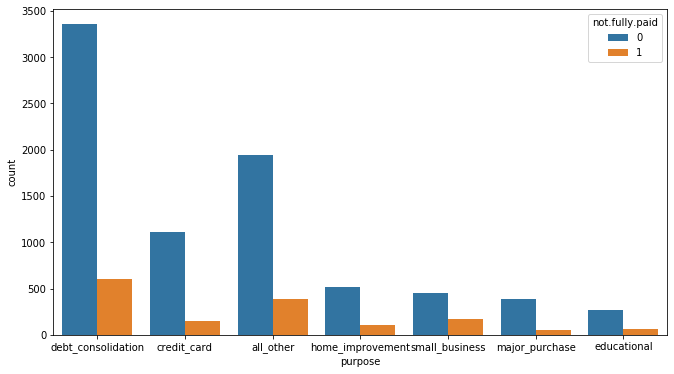

In [8]:
plt.figure(figsize=(11,6))
sns.countplot(data=loans,x=loans['purpose'],hue='not.fully.paid')

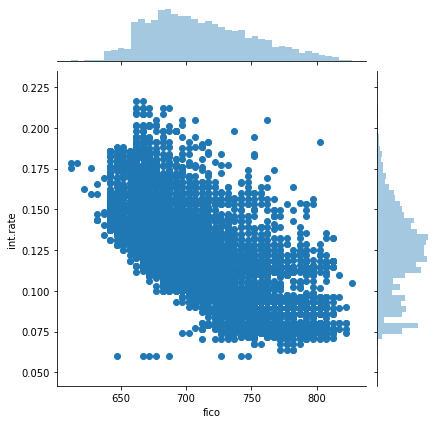

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans)

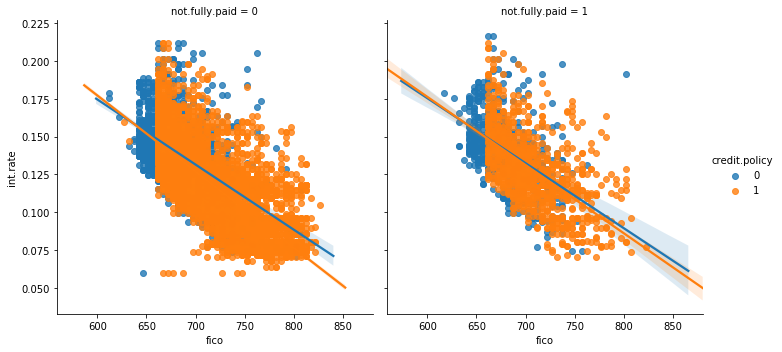

In [10]:
sns.lmplot(x='fico',y='int.rate',data=loans,col='not.fully.paid',hue='credit.policy')

In [11]:
final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True)

In [12]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### Testing Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction and Evaluation of Decision Tree Model

In [20]:
predict_dt = dt.predict(X_test)

In [26]:
print('For Decision Tree Model\n\n')
print('** Confusion Matrix **\n')
print(confusion_matrix(y_test,predict_dt))
print('\n\n** Classification Report **\n')
print(classification_report(y_test,predict_dt))

For Desicion Tree Model


** Confusion Matrix **

[[2155  511]
 [ 382  113]]


** Classification Report **

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2666
           1       0.18      0.23      0.20       495

    accuracy                           0.72      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.74      0.72      0.73      3161



#### Training Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=300)

In [ ]:
rf.fit(X_train,y_train)

#### Prediction and Evaluation of Random Forest Model

In [ ]:
predict_rf = rf.predict(X_test)

In [ ]:
print('For Random Forest Model\n\n')
print('** Confusion Matrix **\n')
print(confusion_matrix(y_test,predict_rf))
print('\n\n** Classification Report **\n')
print(classification_report(y_test,predict_rf))